In [1]:
import numpy as np                        # Math
import scipy.stats as stats               # Statistics
from matplotlib import pyplot as plt      # Plots
from astroML import stats as astroMLstats
from sklearn.neighbors import KernelDensity

In [2]:
def f (chi):
    return np.sqrt( (1 + np.sqrt(1-chi**2)) / 2)

In [28]:
mean = 1
sigma = 0.02
N = 10000

M = np.random.normal(loc=mean, scale=sigma, size=N)
chi = np.random.uniform(0,1,N)

M_irr = f(chi) * M

Basic histogram

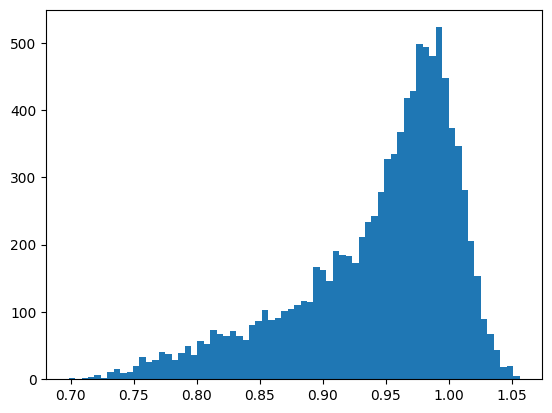

In [29]:
plt.hist(M_irr, bins=70)
plt.show()

Number of bins:50


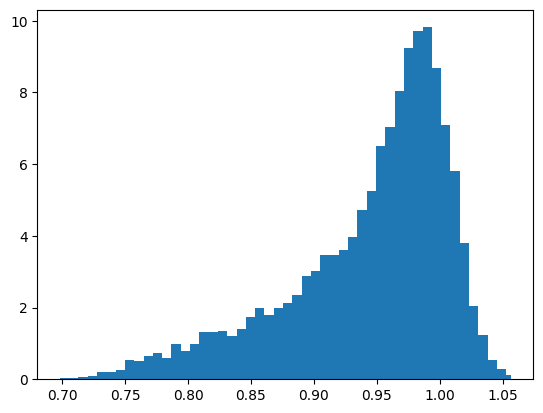

In [30]:
sigmaG2 = astroMLstats.sigmaG(M_irr)

binsize = 2.7*sigmaG2/(N**(1/3))

binsG = np.append(np.arange(start=M_irr.min(), stop=M_irr.max(), step=binsize) , M_irr.max()) #Complete
print("Number of bins:" + str(len(binsG)))

plt.hist(M_irr, bins=binsG, density=True)
plt.show()


Plot with a KDE

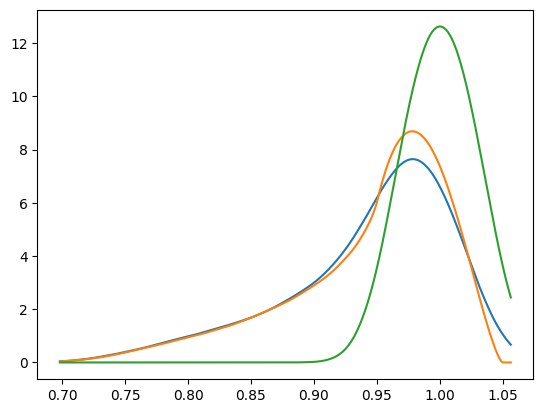

In [31]:
xgrid = np.linspace(M_irr.min(),M_irr.max(),1000) 

def kde_sklearn(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis])

    return np.exp(log_pdf)

PDF_M_irr = kde_sklearn(M_irr,bandwidth=0.05,kernel="epanechnikov")
PDF_f = kde_sklearn(f(chi),bandwidth=0.05,kernel="epanechnikov") 
PDF_M = kde_sklearn(M,bandwidth=0.05,kernel="epanechnikov")

plt.plot(xgrid,PDF_M_irr)
plt.plot(xgrid,PDF_f)
plt.plot(xgrid,PDF_M)

plt.show()

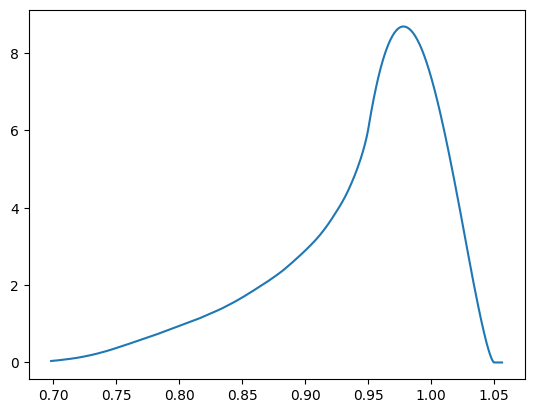

In [32]:
def kde_sklearn_f(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis])

    return np.exp(log_pdf)

PDF_f = kde_sklearn(f(chi),bandwidth=0.05,kernel="epanechnikov") 
plt.plot(xgrid,PDF_f)
plt.show()

In [33]:
def KS_M_irr (sigmav):
    mean = 1
    N = 10000
    
    M = np.random.normal(loc=mean, scale=sigma, size=N)
    chi = np.random.uniform(0,1,N)

    M_irr = f(chi) * M

    PDF_M_irr = kde_sklearn(M_irr,bandwidth=0.05,kernel="epanechnikov")
    PDF_f = kde_sklearn(f(chi),bandwidth=0.05,kernel="epanechnikov")

    return stats.ks_2samp(PDF_M_irr, PDF_f)


print(KS_M_irr(0.000001))


KstestResult(statistic=0.105, pvalue=3.209982841805882e-05, statistic_location=7.558611155975287, statistic_sign=1)


In [34]:
def KS_M (sigmav):
    mean = 1
    N = 10000
    
    M = np.random.normal(loc=mean, scale=sigma, size=N)
    chi = np.random.uniform(0,1,N)

    M_irr = f(chi) * M

    PDF_M_irr = kde_sklearn(M_irr,bandwidth=0.05,kernel="epanechnikov")
    PDF_M = kde_sklearn(M,bandwidth=0.05,kernel="epanechnikov")
    return stats.ks_2samp(PDF_M_irr, PDF_f)


print(KS_M_irr(1000000))


KstestResult(statistic=0.107, pvalue=2.0977827855404345e-05, statistic_location=7.549525636495617, statistic_sign=1)
